## Algorithmic Trading, Machine Learning, and Quant Strategies with Python

- For complex high-end-systems, java or C++ are preffered because they are much faster than python.

# ML in trading

Supervised learning

- Model is trained to make predictions.
- Signal generation through prediction.
- Risk management through prediction.

Unsupervised learning

- Model trained to extract insights from the data.
- The model discovers new patterns, relationships and structures without any labeled or predefined target variables.
- Can be applied in trading through clustering, dimensionality reduction, anomaly detection, market regime detection, portfolio optimization.

# Challenges

- Reflexivity Feedback loop - theory that a feedback loop exists in which investors perceptions affect economic fundamentals which in turn change investor perception.
- Predicting returns.
- Predicting signals.
- Predicting economic indicators e.g. NFP.
- Overfitting - the model learns the train data so well then fails on test data.
- Generalization - model is not performing the same on the real data.

# Workflow process

- Collect and prepare the data
- Develop a hypothesis for a strategy
- Coding the model
- Backtest the strategy


# Project - Unsupervised Learning Trading Strategy (SP500)


# To do

- Download/Load SP500 stocks prices data.
- Calculate different features and indicators on each stock.
- Aggregate on monthly level and filter top 150 most liquid stocks.
- Calculate Monthly Returns for different time-horizons.
- Download Fama-French Factors and Calculate Rolling Factor Betas.
- For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
- For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization.
- Visualize Portfolio returns and compare to SP500 returns.

! Limitation! We are going to use most recent SP500 stocks list, which means that there may be a survivorship bias in this list, in reality you have to use survivorship free data.


# Setup

1. Install anaconda (python and jupyter)

2. Download git for windows and setup a git repo

3. Setup venv

- conda create -p name python=version or python -m venv name (to create)
- conda deactivate (deactivate base kernel)
- conda activate name or .\name\Scripts\activate (to activate)
- pip install ipykernel (install ipykernel inside venv)
- pip list (to confirm list of installed packages)
- python -m ipykernel install --name=name (create a jupyter kernel specific to the venv)
- jupyter kernelspec list (to confirm)
- jupyter kernelspec unistall name


In [35]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings

warnings.filterwarnings("ignore")

In [36]:
# Download SP500 constituents data
# Wikipedia - list of sp500 companies, copy link

pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

[    Symbol              Security             GICS Sector  \
 0      MMM                    3M             Industrials   
 1      AOS           A. O. Smith             Industrials   
 2      ABT                Abbott             Health Care   
 3     ABBV                AbbVie             Health Care   
 4      ACN             Accenture  Information Technology   
 ..     ...                   ...                     ...   
 498    YUM           Yum! Brands  Consumer Discretionary   
 499   ZBRA    Zebra Technologies  Information Technology   
 500    ZBH         Zimmer Biomet             Health Care   
 501   ZION  Zions Bancorporation              Financials   
 502    ZTS                Zoetis             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  Date added  \
 0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
 1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
 2                 Heal

In [37]:
# we are only interested in the first dataframe
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [38]:
# clean up the symbols, replace . with -
sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")

symbols_list = sp500["Symbol"].unique().tolist()

symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [39]:
# dataframe from yfinance for 8 years ago

end_date = "2023-12-31"
start_date = pd.to_datetime(end_date) - pd.DateOffset(
    365 * 8 + 1
)  # 1 unaccounted leap year

df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()
# stack() method creates a multiindex making the dataframe more convinient

df.index.names = ["date", "ticker"]  # assigning names to our indexes

df.columns = df.columns.str.lower()  # fixing column names to lowercase

df

[*********************100%%**********************]  503 of 503 completed


Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134434   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     23.977480   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.392166   57.610001   58.320000   56.400002   58.060001   
           ABT      36.778625   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     196.923355  197.369995  198.009995  196.250000  196.679993   

Price                   volume  
date       ticker               
2016-01-04 A         3287300.0  
           AAL      12037200.0  
           AAPL    270597600.0  
           ABBV     10308400.0  
           ABT      12227500.0  
...                        ...  
2023-12-29 YUM       1196800.0  
           ZBH        849600.0  
           ZBRA       251300.0  
           ZION      1420600.0  
           ZTS       1007200.0  

[994508 rows x 6 columns]

# Calculate features and technical indicators for each stock.

- Garman-Klass Volatility
- RSI
- Bollinger Bands
- ATR
- MACD
- Dollar Volume


\begin{equation}
\text{Garman-Klass Volatility} = \frac{(\ln(\text{High}) - \ln(\text{Low}))^2}{2} - (2\ln(2) - 1)(\ln(\text{Adj Close}) - \ln(\text{Open}))^2
\end{equation}


In [40]:
df["garman_klass_vol"] = ((np.log(df["high"]) - np.log(df["low"])) ** 2) / 2 - (
    2 * np.log(2) - 1
) * ((np.log(df["adj close"]) - np.log(df["open"])) ** 2)

df["rsi"] = df.groupby(level=1)["adj close"].transform(
    lambda x: pandas_ta.rsi(close=x, length=20)
)  # group by ticker, select adjusted close column, use transform method, lamda function, use pandas_ta to calculate RSI (Relative Strength Index)
# the RSI is not normalized

# Bolinger Bands
# Lower bb
df["bb_low"] = df.groupby(level=1)["adj close"].transform(
    lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0]
)  # This function returns 3 columns, the first one is assigned to bb_low

df["bb_mid"] = df.groupby(level=1)["adj close"].transform(
    lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1]
)

df["bb_high"] = df.groupby(level=1)["adj close"].transform(
    lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2]
)


# Compute the Average True Range
# ATR needs 3 inputs, transform method only takes 1. Therefore use groupby.apply
def compute_atr(stock_data):
    atr = pandas_ta.atr(
        high=stock_data["high"],
        low=stock_data["low"],
        close=stock_data["close"],
        length=14,
    )
    return atr.sub(atr.mean()).div(
        atr.std()
    )  # normalize the data so as to use it in ml to cluster the data


df["atr"] = df.groupby(level=1, group_keys=False).apply(
    compute_atr
)  # the additional argument group_keys=False prevents it from doubling the dates


# Moving Average Convergence/Divergence
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:, 0]
    return macd.sub(macd.mean()).div(
        macd.std()
    )  # normalize the data so as to use it in ml to cluster the data


df["macd"] = df.groupby(level=1, group_keys=False)["adj close"].apply(compute_macd)

df["dollar_volume"] = (
    df["adj close"] * df["volume"]
) / 1e6  # dollar volume in millions

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134434   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     23.977480   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.392166   57.610001   58.320000   56.400002   58.060001   
           ABT      36.778625   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     196.923355  197.369995  198.009995  196.250000  196.679993   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.001233        NaN       NaN   
           ABBV     10308400.0         -0.050297        NaN       NaN   
           ABT      12227500.0         -0.011585        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.767246  4.753563   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.879829  3.611585   
           ZTS       1007200.0          0.000039  66.791324  5.184195   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-01-04 A            NaN       NaN       NaN       NaN     125.359324  
           AAL          NaN       NaN       NaN       NaN     470.599813  
           AAPL         NaN       NaN       NaN       NaN    6488.248524  
           ABBV         NaN       NaN       NaN       NaN     416.378605  
           ABT          NaN       NaN       NaN       NaN     449.710643  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.862793  4.900952 -0.073239  0.784240     156.373892  
           ZBH     4.784470  4.815377 -1.054422  0.973531     103.396317  
           ZBRA    5.546306  5.676707 -0.154931  1.577769      68.687826  
           ZION    3.749483  3.887381  0.177122  2.099563      62.321720  
           ZTS     5.257195  5.330194  0.420520  2.164720     198.341203  

[994508 rows x 14 columns]

# Aggregate to monthly level and filter top 150 most liquid stocks for each month.

- To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.


In [41]:
last_cols = [
    c
    for c in df.columns.unique(0)  # selects the 1st element
    if c not in ["dollar_volume", "volume", "open", "high", "low", "close"]
]  # selects the columns not in the specified array

data = (
    pd.concat(
        [
            df.unstack("ticker")["dollar_volume"]
            .resample("M")
            .mean()
            .stack("ticker")
            .to_frame("dollar_volume"),
            df.unstack()[last_cols].resample("M").last().stack("ticker"),
        ],  # unstack the ticker level and select the dollar_volume column, resample to monthly and take the mean, stack back to ticker then make it a dataframe with a dollar_volume column
        axis=1,
    )
).dropna()

data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2016-02-29 A           91.918057   35.004215 -0.932886  3.620122  3.522492   
           AAL        338.977829   39.288372  0.977081  3.729458  3.547833   
           AAPL      3548.073861   22.125883 -1.017466  3.155194  3.106253   
           ABBV       353.627766   38.690910 -0.477602  3.725388  3.629341   
           ABT        244.683656   33.398457 -0.797320  3.566251  3.479070   
...                          ...         ...       ...       ...       ...   
2023-12-31 YUM        207.539266  130.660004 -0.073239  4.900952  4.824633   
           ZBH        207.682671  121.699997 -1.054422  4.815377  4.753563   
           ZBRA        98.037275  273.329987 -0.154931  5.676707  5.415905   
           ZION       102.724363   43.869999  0.177122  3.887381  3.611585   
           ZTS        334.396200  196.923355  0.420520  5.330194  5.184195   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2016-02-29 A       3.571307         -0.001913 -0.240043  48.107976  
           AAL     3.638646         -0.000319  0.529241  56.664327  
           AAPL    3.130723         -0.003013 -0.330066  48.335907  
           ABBV    3.677365         -0.051766 -0.288564  47.896413  
           ABT     3.522661         -0.009964 -0.394514  47.035003  
...                     ...               ...       ...        ...  
2023-12-31 YUM     4.862793          0.000030  0.784240  59.338371  
           ZBH     4.784470          0.000044  0.973531  68.767246  
           ZBRA    5.546306          0.000073  1.577769  67.914673  
           ZION    3.749483          0.000102  2.099563  62.879829  
           ZTS     5.257195          0.000039  2.164720  66.791324  

[46953 rows x 9 columns]

- Calculate 5-year rolling average of dollar volume for each stocks before filtering.


In [42]:
data["dollar_volume"] = (
    data.loc[:, "dollar_volume"]
    .unstack("ticker")
    .rolling(5 * 12, min_periods=12)
    .mean()
    .stack()
)

data["dollar_vol_rank"] = data.groupby("date")["dollar_volume"].rank(ascending=False)

data = data[data["dollar_vol_rank"] < 150].drop(
    ["dollar_volume", "dollar_vol_rank"], axis=1
)

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-01-31 AAL      42.760242  1.295678  3.891346  3.789143  3.840245   
           AAPL     28.233545 -1.191554  3.389455  3.332440  3.360948   
           ABBV     44.951492 -1.207862  3.868023  3.805577  3.836800   
           ABT      36.922539 -1.167994  3.639048  3.572445  3.605747   
           ACN     101.850807 -1.021878  4.664272  4.634323  4.649298   
...                       ...       ...       ...       ...       ...   
2023-12-31 VRTX    406.890015  1.086119  6.088512  5.817492  5.953002   
           VZ       37.074799 -1.182997  3.665356  3.616386  3.640871   
           WFC      49.220001 -0.753985  3.975643  3.800094  3.887869   
           WMT     157.649994 -0.005190  5.072549  5.018094  5.045321   
           XOM      99.980003  0.072672  4.651270  4.594084  4.622677   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2017-01-31 AAL            -0.000522 -0.163934  42.277596  
           AAPL           -0.001885 -0.108144  67.547820  
           ABBV           -0.031911 -0.322387  49.245610  
           ABT            -0.003303  0.206063  66.810985  
           ACN            -0.004805 -0.450312  41.080197  
...                             ...       ...        ...  
2023-12-31 VRTX            0.000028  3.205584  65.899356  
           VZ              0.000043  0.466399  57.985178  
           WFC             0.000025  1.913446  67.347849  
           WMT             0.000017 -0.274379  52.372668  
           XOM             0.000041 -0.683288  42.607132  

[12516 rows x 8 columns]

# Calculate Monthly Returns for different time horizons as features.

- To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.


In [43]:
def calculate_returns(df):
    outlier_cutoff = 0.005  # for clipping, all values above this threshhold will be assigned the outlier value in this case the 99.5th percentile

    lags = [1, 2, 3, 6, 9, 12]  # lags for 1 month, 2 months..

    for lag in lags:
        df[f"return_{lag}m"] = (
            df["adj close"]
            .pct_change(lag)
            .pipe(
                lambda x: x.clip(
                    lower=x.quantile(outlier_cutoff),
                    upper=x.quantile(1 - outlier_cutoff),
                )
            )
            .add(1)
            .pow(1 / lag)
            .sub(1)
        )
    return df


data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-01-31 AAL      52.943867  1.275944  4.089372  3.908840  3.999106   
           AAPL     39.581043 -0.960483  3.781592  3.700759  3.741176   
           ABBV     85.312187  1.476496  4.526612  4.262648  4.394630   
           ABT      56.127327 -0.696011  4.069166  3.951524  4.010345   
           ACN     146.635620 -0.984613  5.011877  4.964964  4.988420   
...                       ...       ...       ...       ...       ...   
2023-12-31 VRTX    406.890015  1.086119  6.088512  5.817492  5.953002   
           VZ       37.074799 -1.182997  3.665356  3.616386  3.640871   
           WFC      49.220001 -0.753985  3.975643  3.800094  3.887869   
           WMT     157.649994 -0.005190  5.072549  5.018094  5.045321   
           XOM      99.980003  0.072672  4.651270  4.594084  4.622677   

                   garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                     
2018-01-31 AAL             0.000502  0.617050  53.332161   0.044013   
           AAPL           -0.001000 -0.414727  40.100688  -0.010636   
           ABBV           -0.035857  2.091141  62.305712   0.168700   
           ABT            -0.004576  0.975508  69.274947   0.094398   
           ACN            -0.002948  0.293258  63.135276   0.049709   
...                             ...       ...        ...        ...   
2023-12-31 VRTX            0.000028  3.205584  65.899356   0.146783   
           VZ              0.000043  0.466399  57.985178  -0.016436   
           WFC             0.000025  1.913446  67.347849   0.103835   
           WMT             0.000017 -0.274379  52.372668   0.016350   
           XOM             0.000041 -0.683288  42.607132  -0.026864   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-01-31 AAL      0.037235   0.051541   0.013139   0.028045    0.017961  
           AAPL    -0.012944  -0.001992   0.021212   0.018481    0.028553  
           ABBV     0.079892   0.077893   0.081693   0.063580    0.054846  
           ABT      0.052610   0.048209   0.041483   0.041095    0.035516  
           ACN      0.041987   0.041220   0.039209   0.032852    0.030836  
...                      ...        ...        ...        ...         ...  
2023-12-31 VRTX     0.060030   0.053758   0.024490   0.028824    0.028985  
           VZ       0.035933   0.055029   0.008786   0.002693    0.002233  
           WFC      0.117430   0.067168   0.026895   0.033852    0.017357  
           WMT     -0.015960  -0.003544   0.001708   0.008697    0.010148  
           XOM     -0.023690  -0.049736  -0.008782  -0.007363   -0.005374  

[10350 rows x 14 columns]

# Download Fama-French Factors and Calculate Rolling Factor Betas.

- We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

- The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

- We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.


In [44]:
# Google fama french factors data library
factor_data = web.DataReader(
    "F-F_Research_Data_5_Factors_2x3", "famafrench", start="2010"
)[0].drop(
    "RF", axis=1
)  # the data reader returns the monthly factors and yearly factors, select monthlty. Drop the risk free return


factor_data.index = factor_data.index.to_timestamp()  # change date format


factor_data = (
    factor_data.resample("M").last().div(100)
)  # change date to last day of the month, converts rates from percentage


factor_data.index.name = "date"  # date is small letters


factor_data = factor_data.join(
    data["return_1m"]
).sort_index()  # join the factors with 1 month return

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-01-31 AAL     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.044013
           AAPL    0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.010636
           ABBV    0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.168700
           ABT     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.094398
           ACN     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.049709
...                   ...     ...     ...     ...     ...        ...
2023-12-31 VRTX    0.0485  0.0732  0.0494 -0.0307  0.0132   0.146783
           VZ      0.0485  0.0732  0.0494 -0.0307  0.0132  -0.016436
           WFC     0.0485  0.0732  0.0494 -0.0307  0.0132   0.103835
           WMT     0.0485  0.0732  0.0494 -0.0307  0.0132   0.016350
           XOM     0.0485  0.0732  0.0494 -0.0307  0.0132  -0.026864

[10350 rows x 6 columns]

- Filter out stocks with less than 10 months of data because we are going to be using rolling window for 24 months regression.


In [45]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[
    factor_data.index.get_level_values("ticker").isin(valid_stocks.index)
]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-01-31 AAL     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.044013
           AAPL    0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.010636
           ABBV    0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.168700
           ABT     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.094398
           ACN     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.049709
...                   ...     ...     ...     ...     ...        ...
2023-12-31 VRTX    0.0485  0.0732  0.0494 -0.0307  0.0132   0.146783
           VZ      0.0485  0.0732  0.0494 -0.0307  0.0132  -0.016436
           WFC     0.0485  0.0732  0.0494 -0.0307  0.0132   0.103835
           WMT     0.0485  0.0732  0.0494 -0.0307  0.0132   0.016350
           XOM     0.0485  0.0732  0.0494 -0.0307  0.0132  -0.026864

[10304 rows x 6 columns]

- Calculate Rolling Factor Betas.


In [46]:
betas = factor_data.groupby(level=1, group_keys=False).apply(
    lambda x: RollingOLS(
        endog=x["return_1m"],
        exog=sm.add_constant(x.drop("return_1m", axis=1)),
        window=min(
            24, x.shape[0]
        ),  # either use 24 months or the number or months present for a particular stock
        min_nobs=len(x.columns) + 1,
    )
    .fit(params_only=True)
    .params.drop("const", axis=1)
)

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-01-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-12-31 VRTX    0.360415  0.009107 -0.291635 -0.024355  0.716337
           VZ      0.441478 -0.657780  0.529062  0.182582 -0.222432
           WFC     1.028876  0.200399  1.979781 -0.295540 -1.477347
           WMT     0.515456  0.193586 -0.756227  0.638940  0.818299
           XOM     0.738270 -0.467575  1.071821  0.523876  0.308785

[10304 rows x 5 columns]

- Join the rolling factors data to the main features dataframe.
- Recall that the betas for a specific month would be known the next month, therefore shift by 1 month before grouping.


In [47]:
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]

data = data.join(betas.groupby("ticker").shift())

data.loc[:, factors] = data.groupby("ticker", group_keys=False)[factors].apply(
    lambda x: x.fillna(x.mean())
)  # fill all NaN values with the mean of the other factors

data = data.drop("adj close", axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10175 entries, (Timestamp('2018-01-31 00:00:00'), 'AAL') to (Timestamp('2023-12-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               10175 non-null  float64
 1   bb_high           10175 non-null  float64
 2   bb_low            10175 non-null  float64
 3   bb_mid            10175 non-null  float64
 4   garman_klass_vol  10175 non-null  float64
 5   macd              10175 non-null  float64
 6   rsi               10175 non-null  float64
 7   return_1m         10175 non-null  float64
 8   return_2m         10175 non-null  float64
 9   return_3m         10175 non-null  float64
 10  return_6m         10175 non-null  float64
 11  return_9m         10175 non-null  float64
 12  return_12m        10175 non-null  float64
 13  Mkt-RF            10175 non-null  float64
 14  SMB               10175 non-null  float64
 15  HML        

### At this point we have to decide on what ML model and approach to use for predictions etc.


# For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.

# K-Means Clustering

- You may want to initialize predefined centroids for each cluster based on your research.

- For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

- Then we will pre-define our centroids for each cluster.


In [48]:
from sklearn.cluster import KMeans

# google how to decide n_clusters
# Using random initialization would not woek in this case because we are looking for stocks that have an upward momentum in the previous month. Therefore an RSI value of about 70. Therefore supply initial centroid. Check kmeans documentation.

target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values


def get_clusters(df):
    df["cluster"] = (
        KMeans(n_clusters=4, random_state=0, init=initial_centroids).fit(df).labels_
    )
    return df


data = data.drop(
    "cluster", axis=1
)  # drop the cluster column before calling the function, ensure the features remain 18

data = data.dropna().groupby("date", group_keys=False).apply(get_clusters)


data

KeyError: "['cluster'] not found in axis"

In [ ]:
# visualise the clustering job with scatter plots
def plot_clusters(data):
    cluster_0 = data[data["cluster"] == 0]
    cluster_1 = data[data["cluster"] == 1]
    cluster_2 = data[data["cluster"] == 2]
    cluster_3 = data[data["cluster"] == 3]

    plt.scatter(
        cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color="red", label="cluster 0"
    )  # 1st column(ATR) vs 7th column (RSI)
    plt.scatter(
        cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color="green", label="cluster 1"
    )
    plt.scatter(
        cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color="blue", label="cluster 2"
    )
    plt.scatter(
        cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color="black", label="cluster 3"
    )

    plt.legend()
    plt.show()
    return

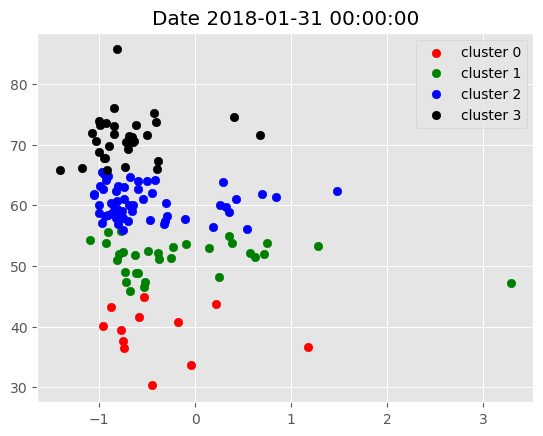

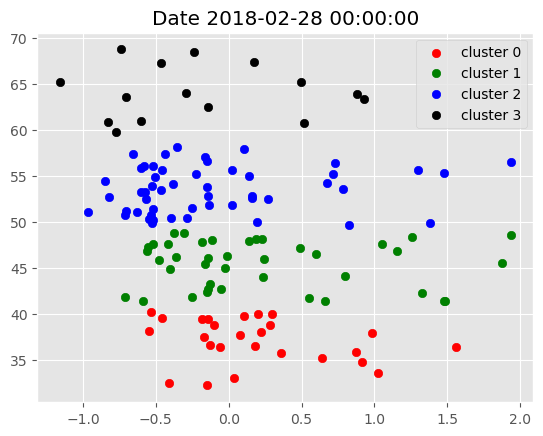

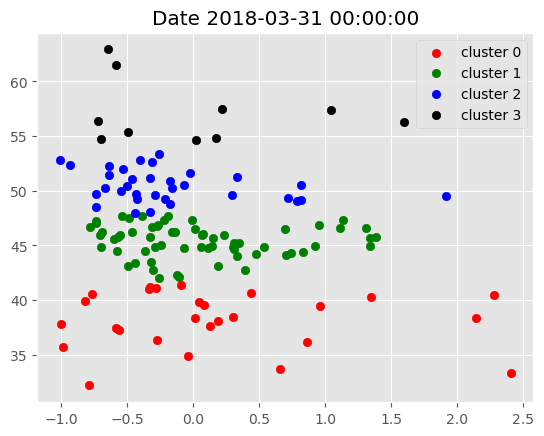

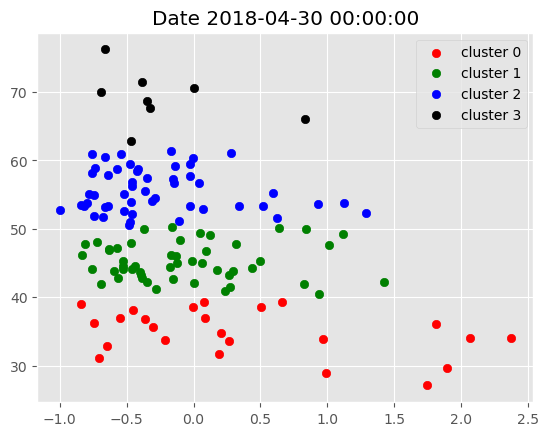

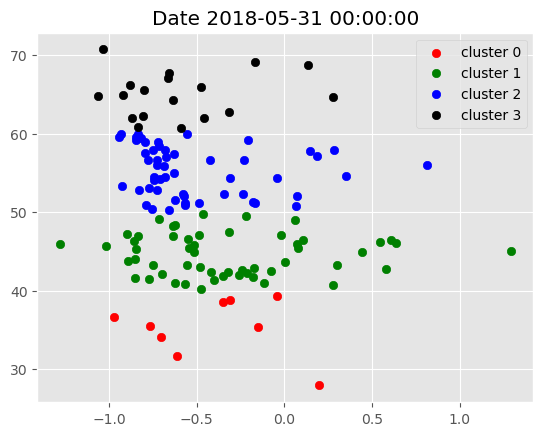

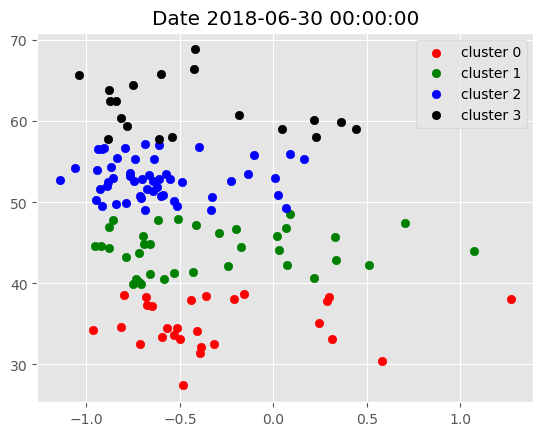

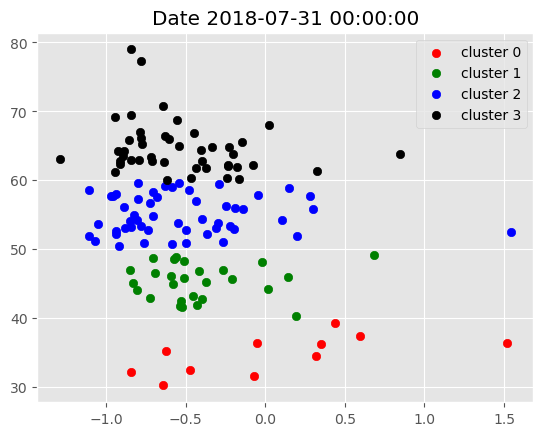

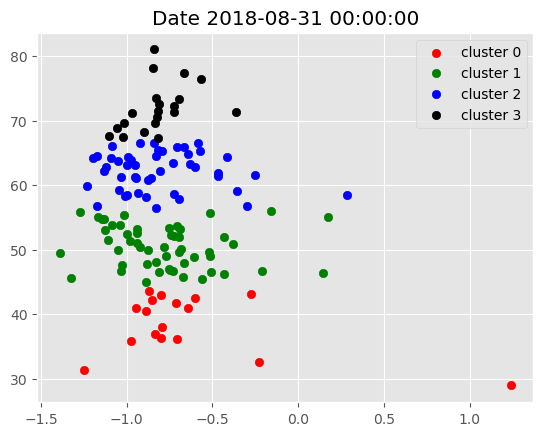

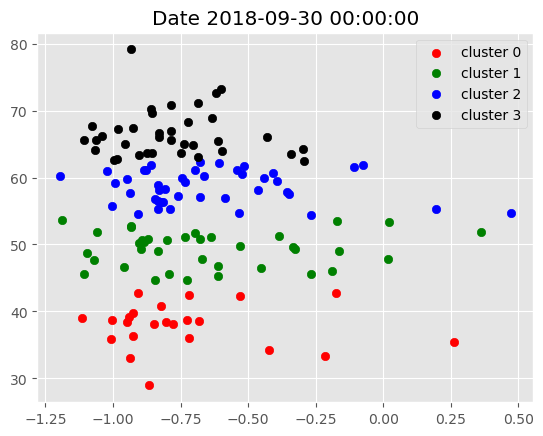

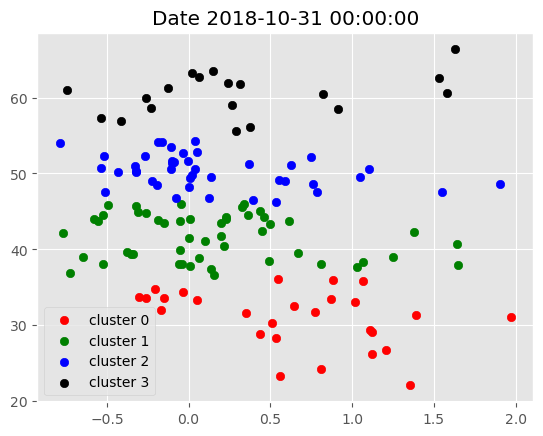

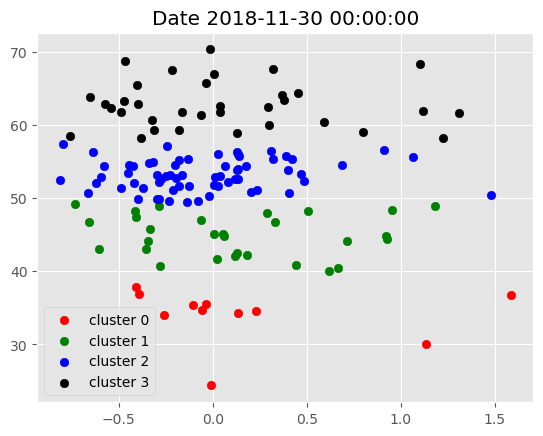

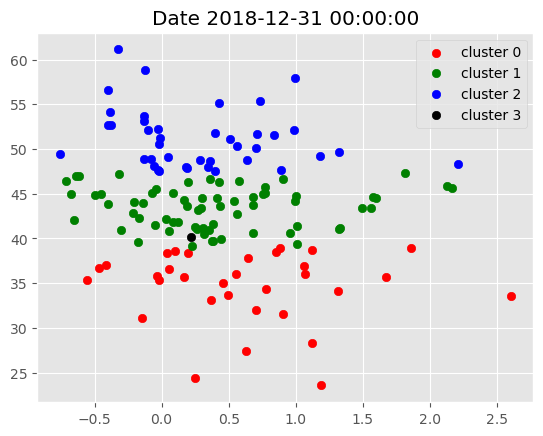

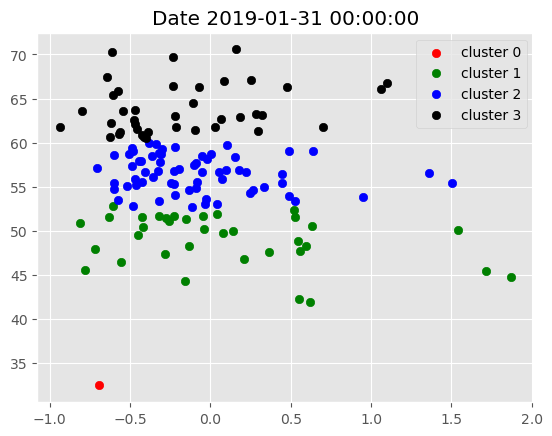

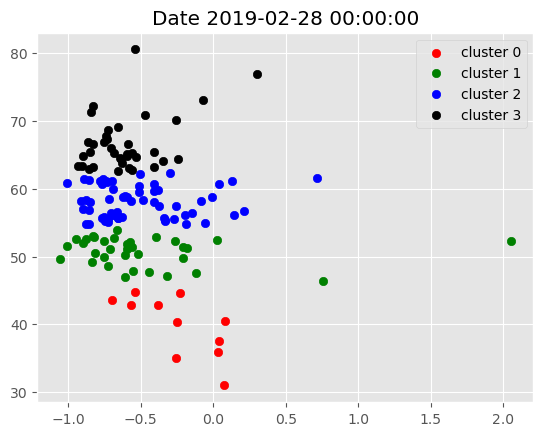

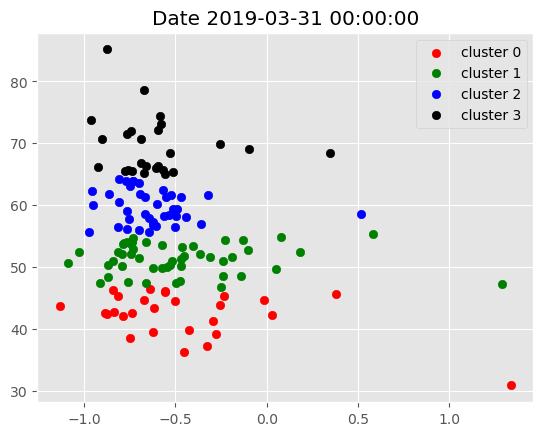

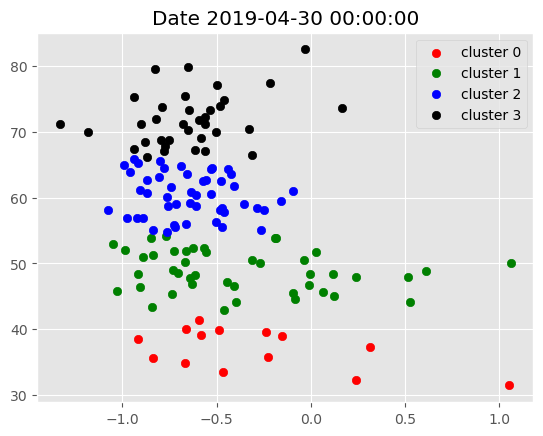

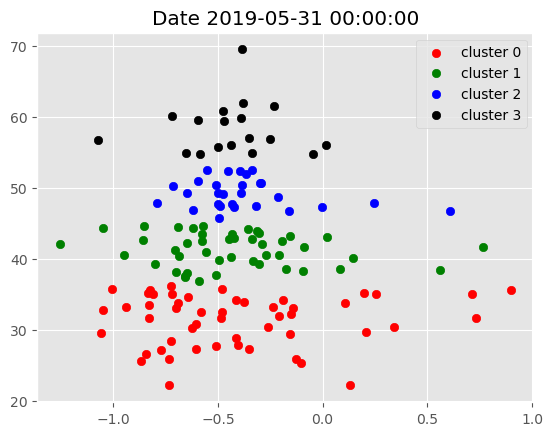

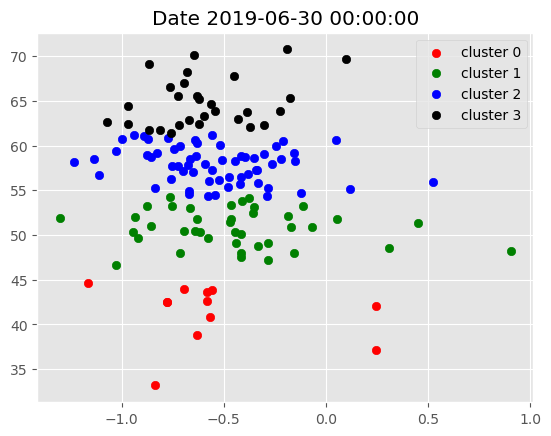

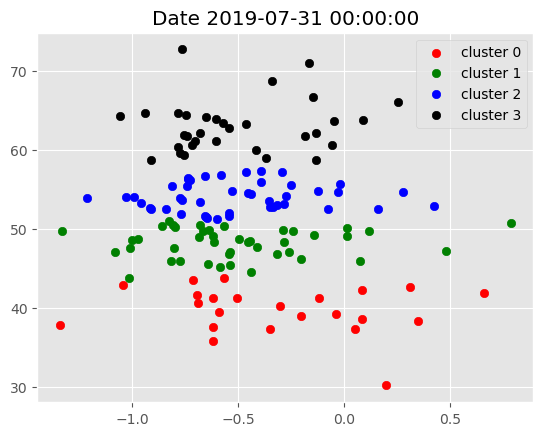

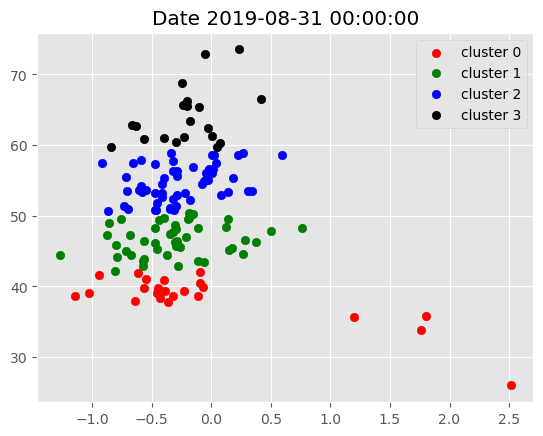

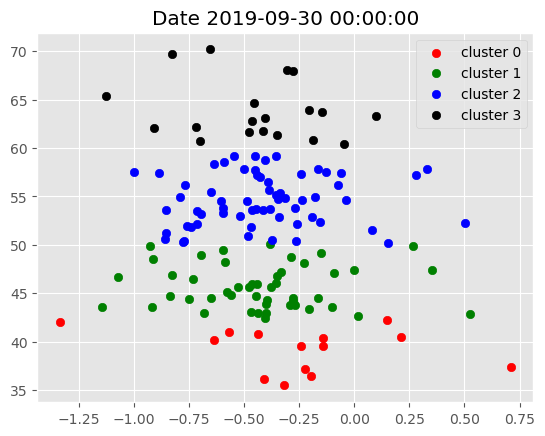

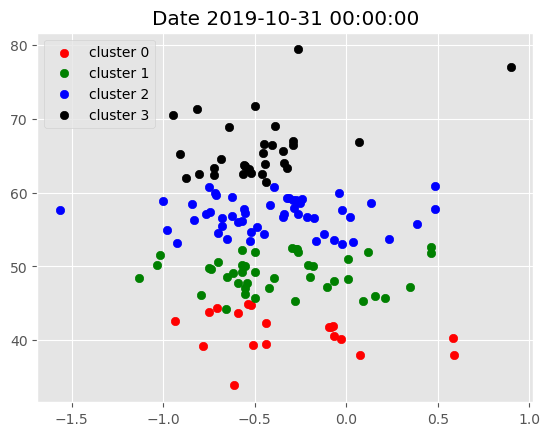

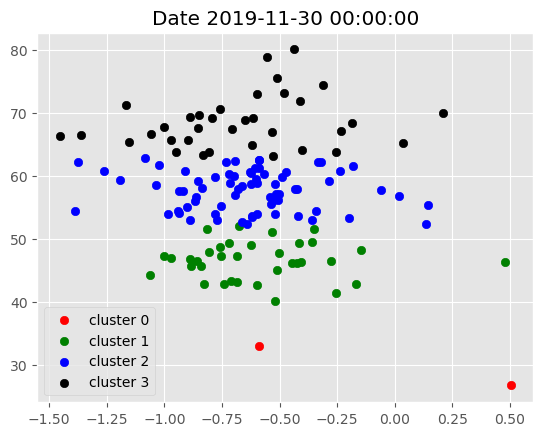

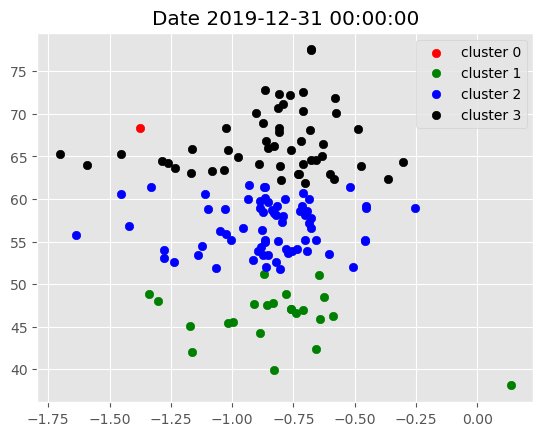

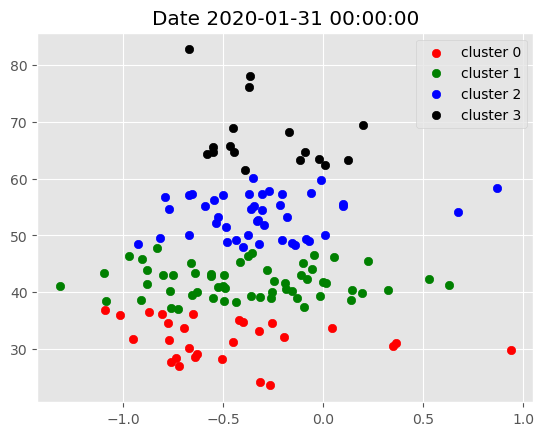

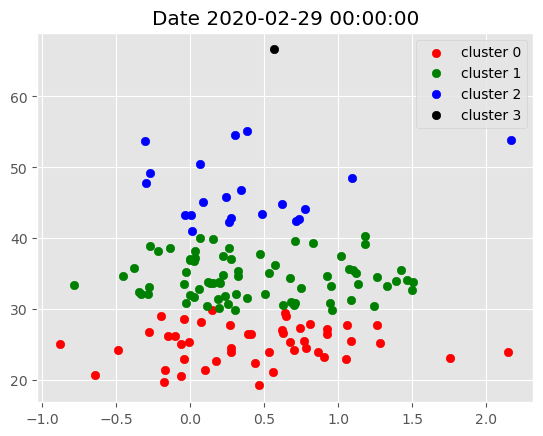

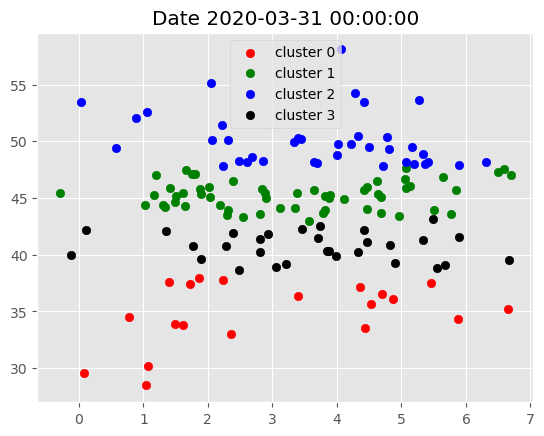

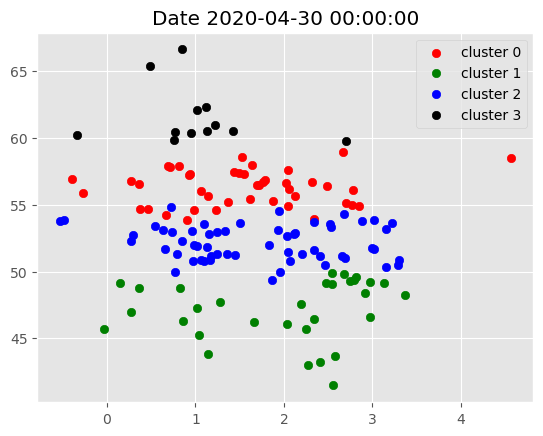

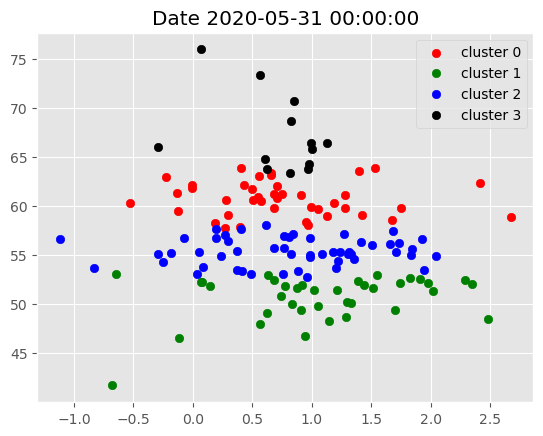

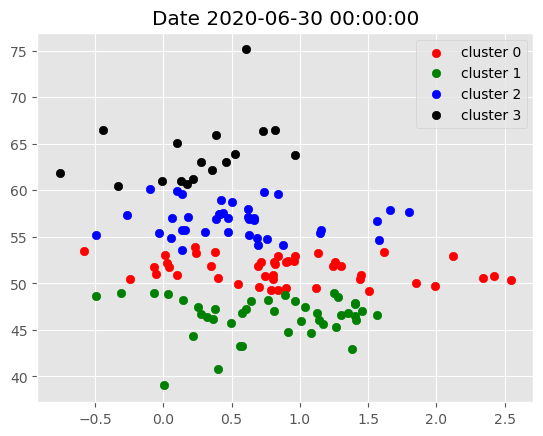

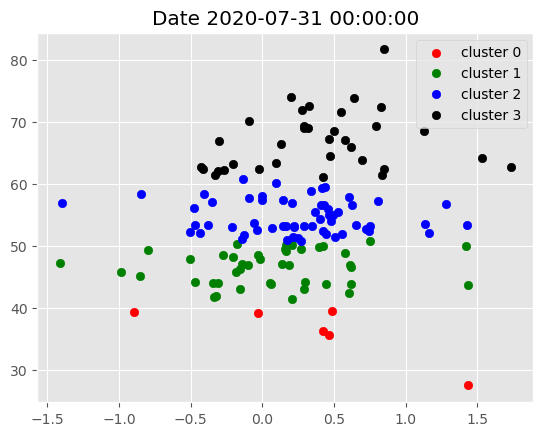

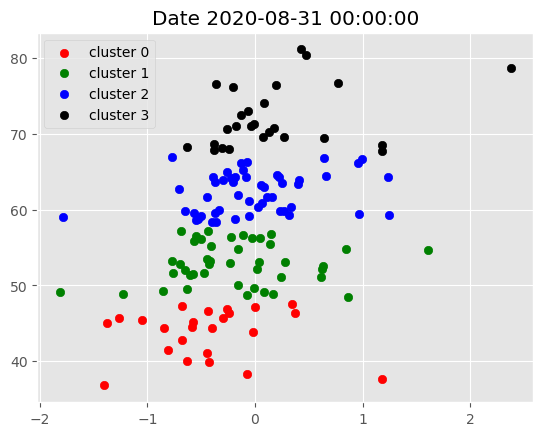

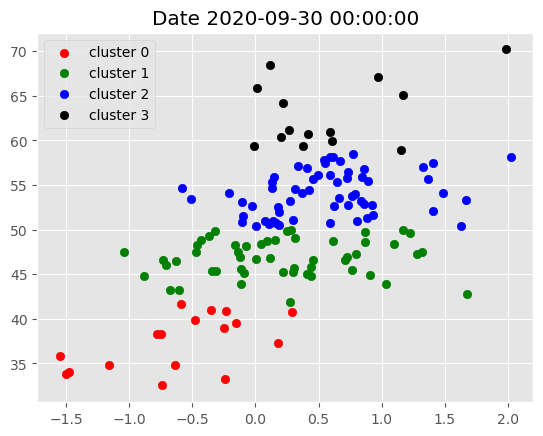

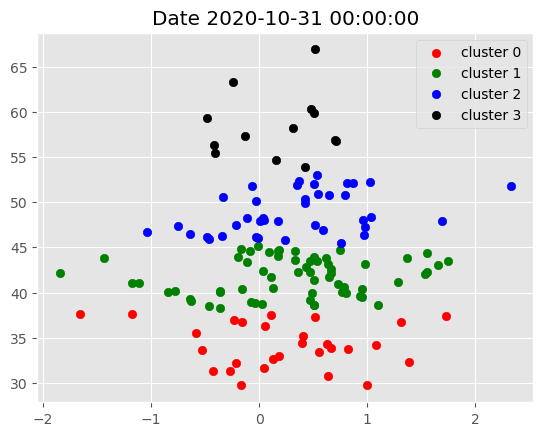

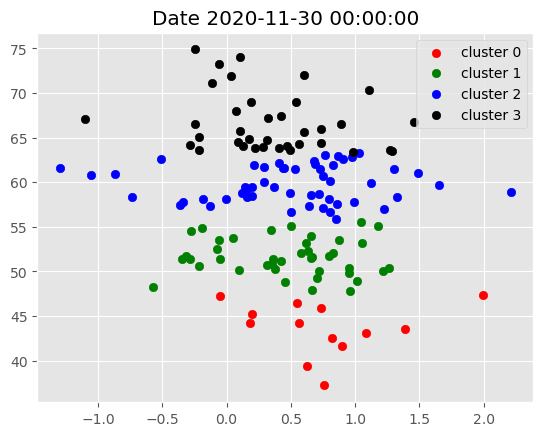

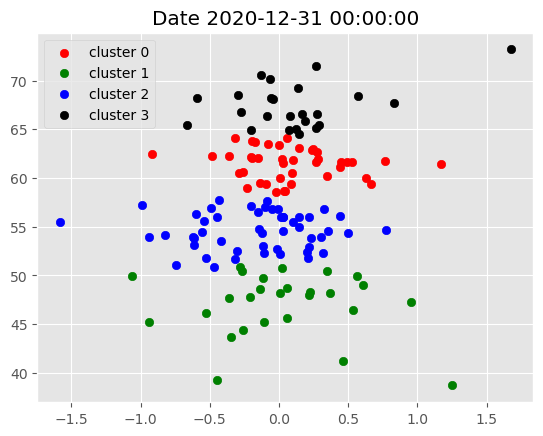

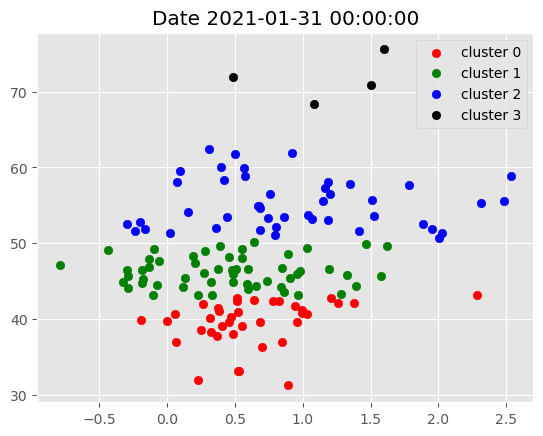

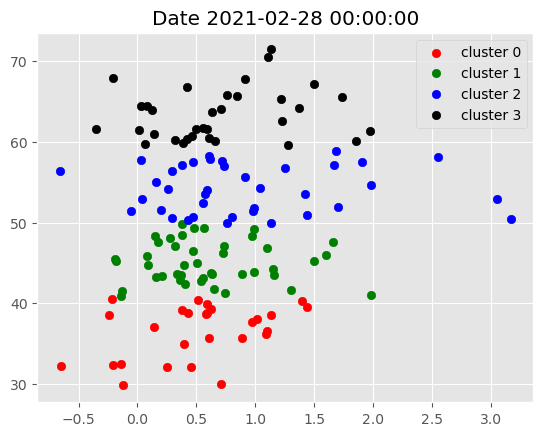

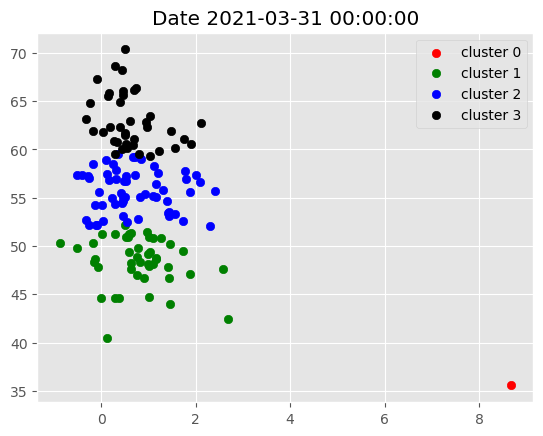

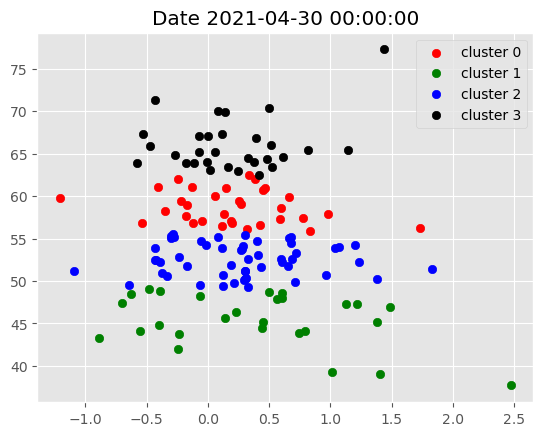

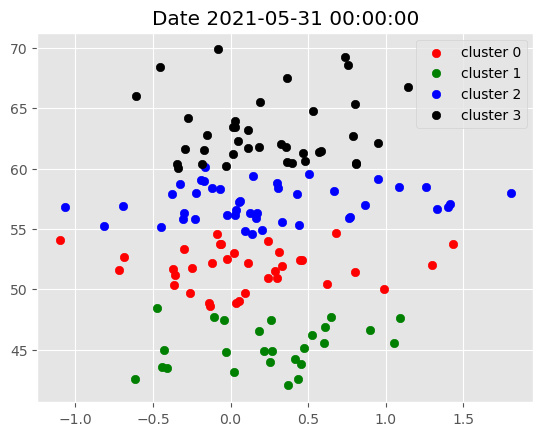

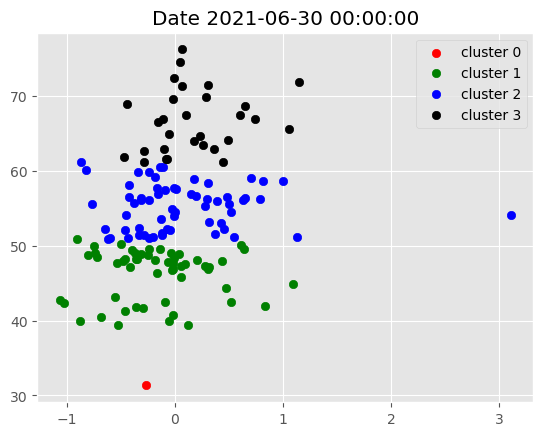

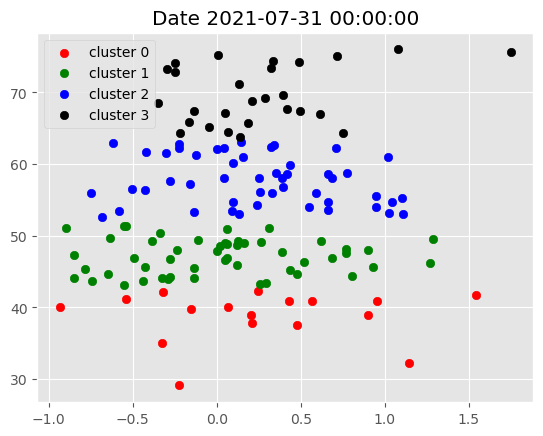

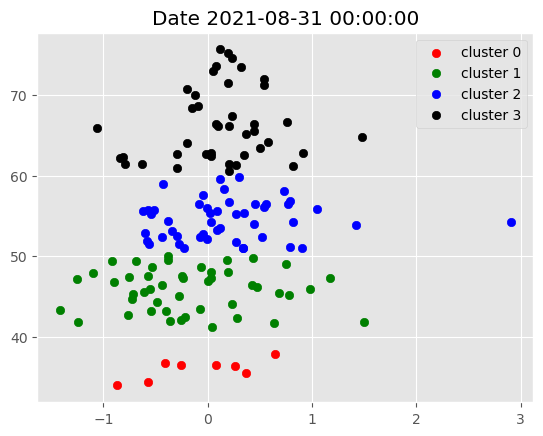

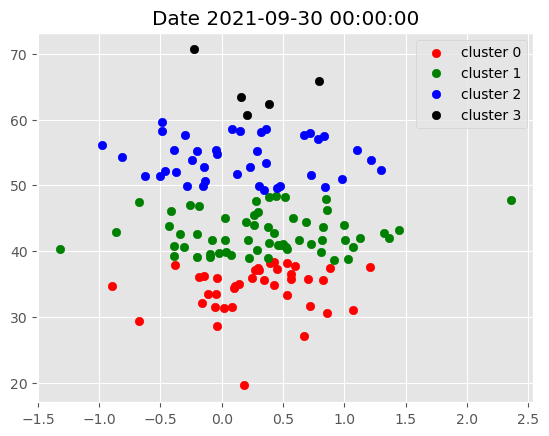

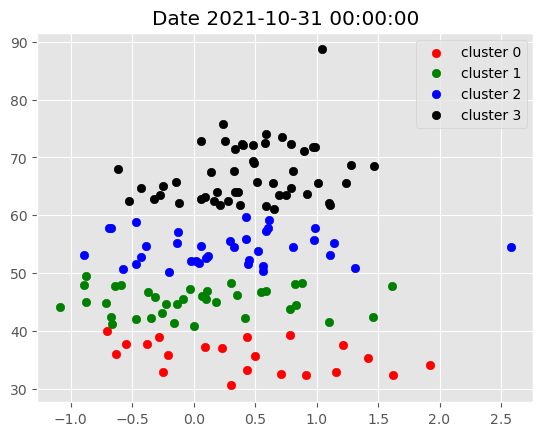

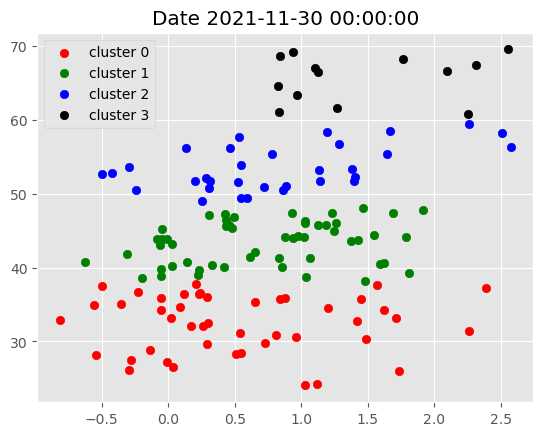

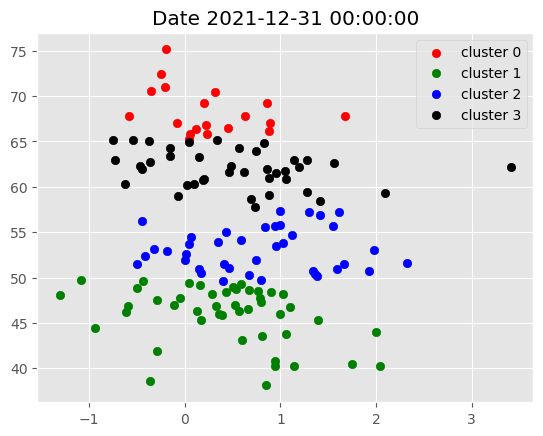

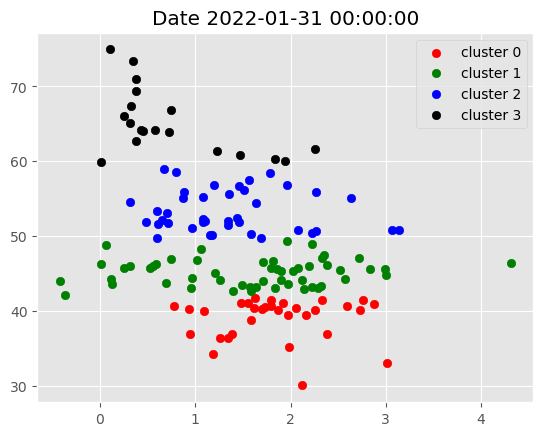

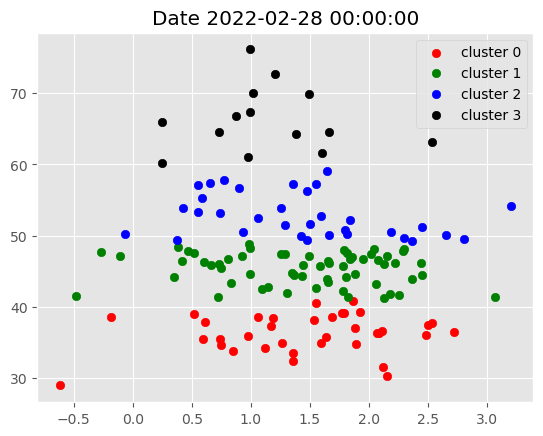

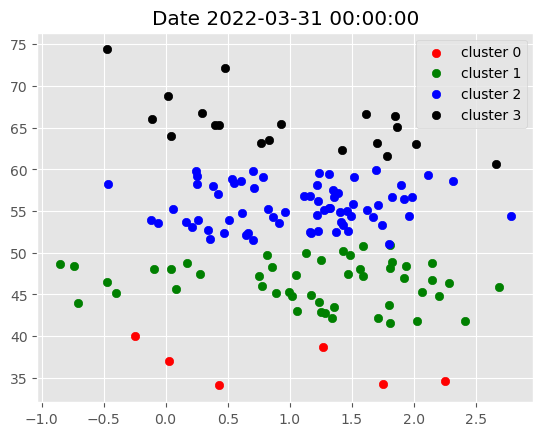

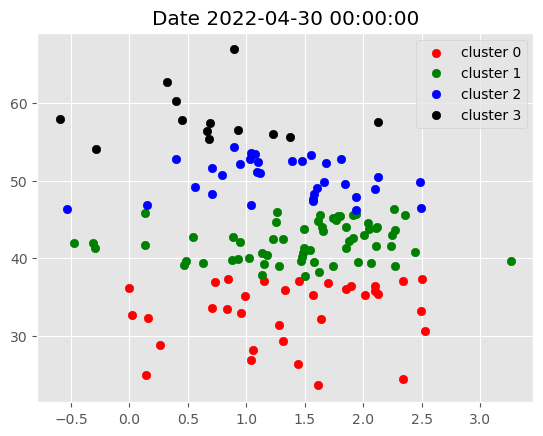

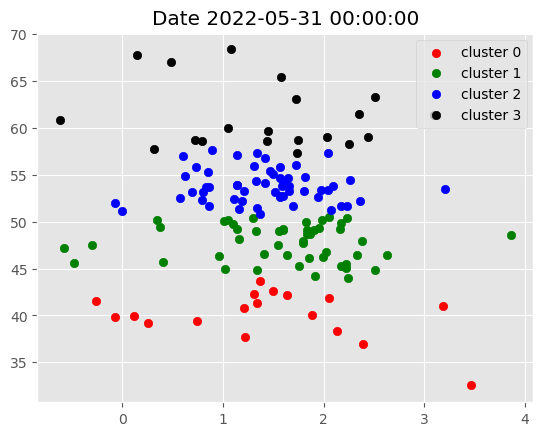

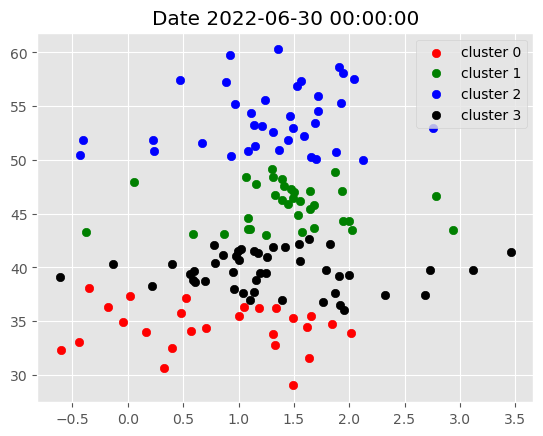

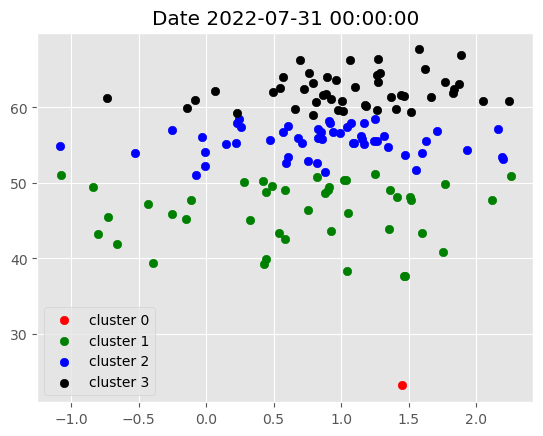

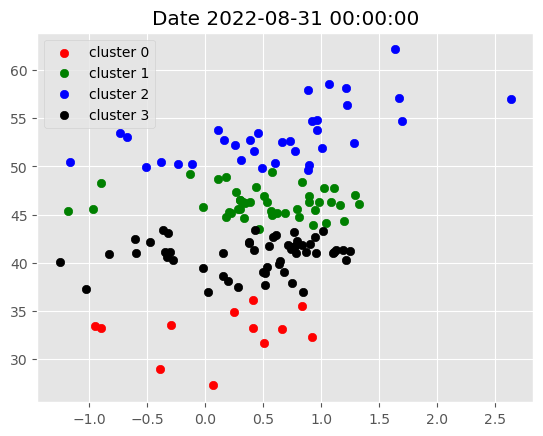

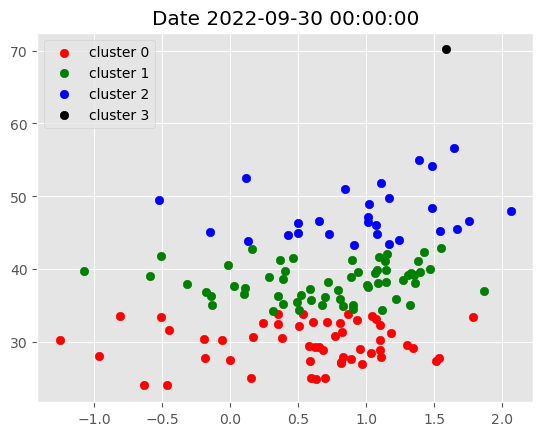

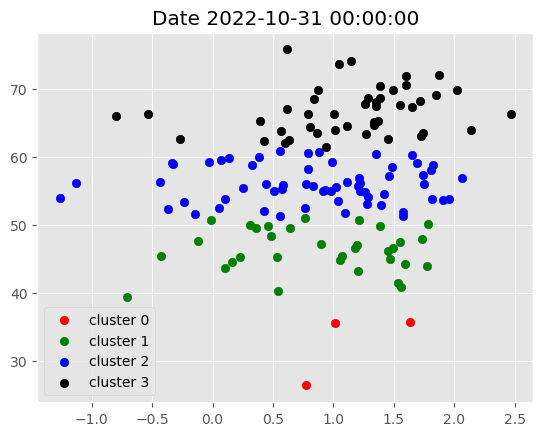

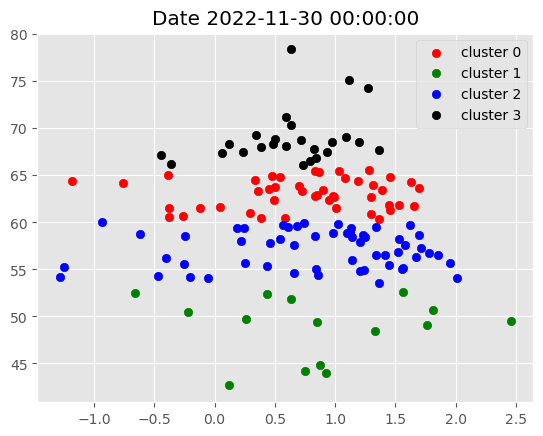

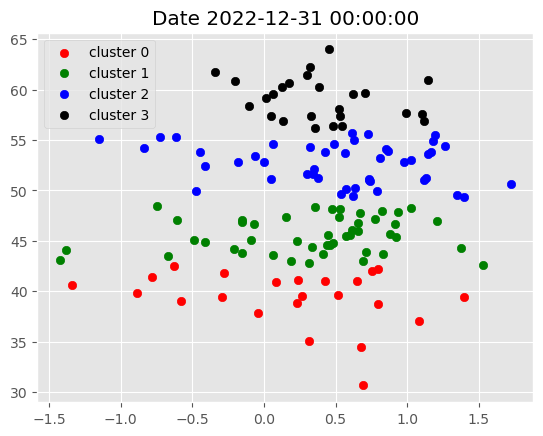

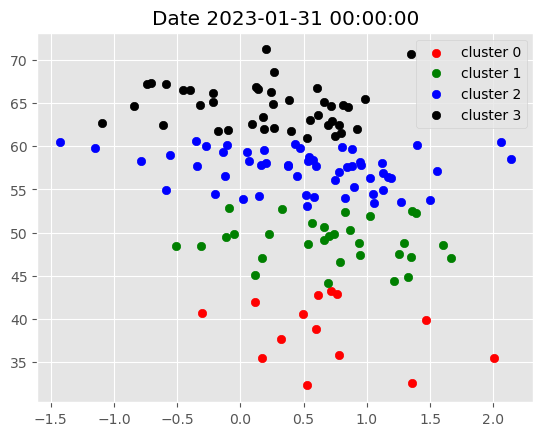

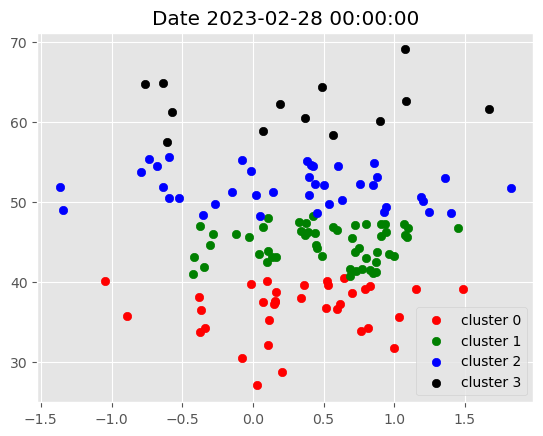

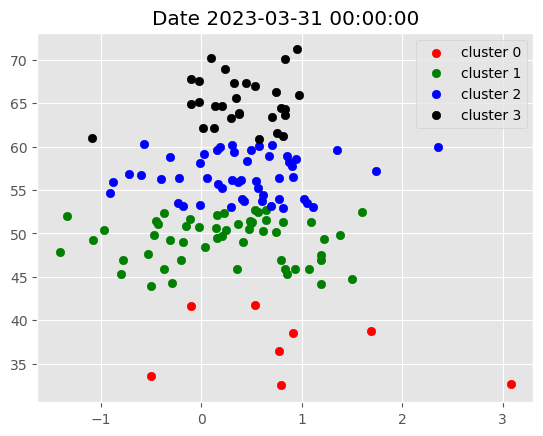

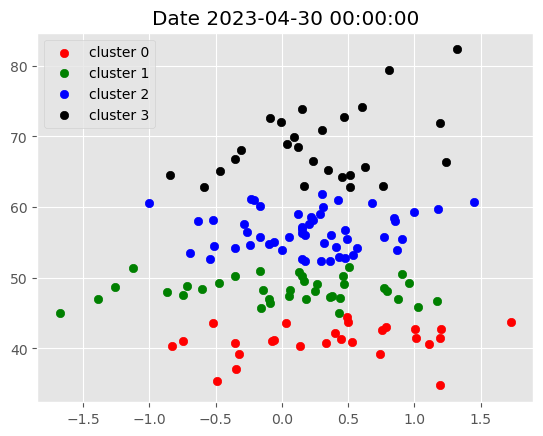

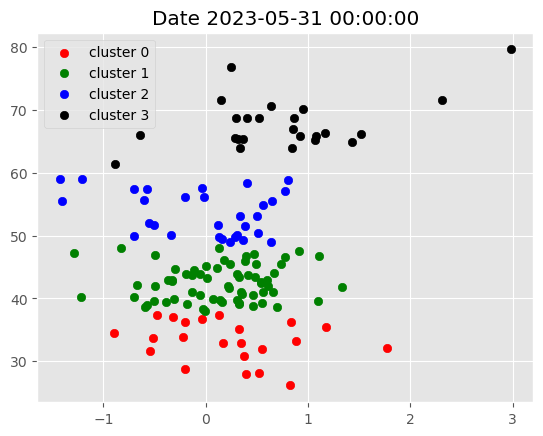

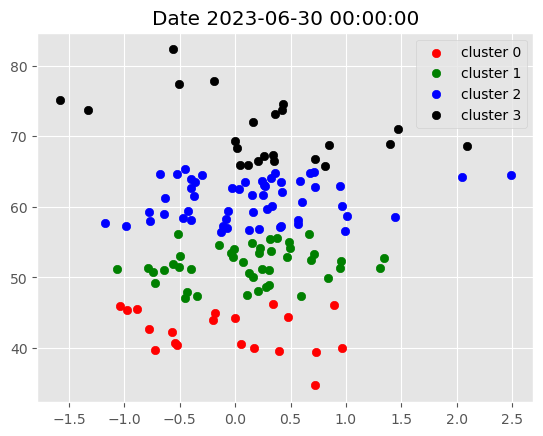

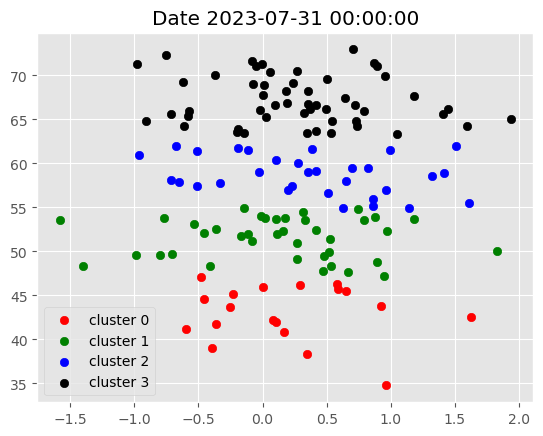

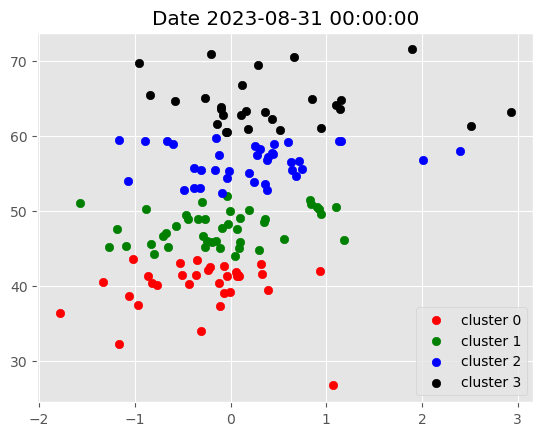

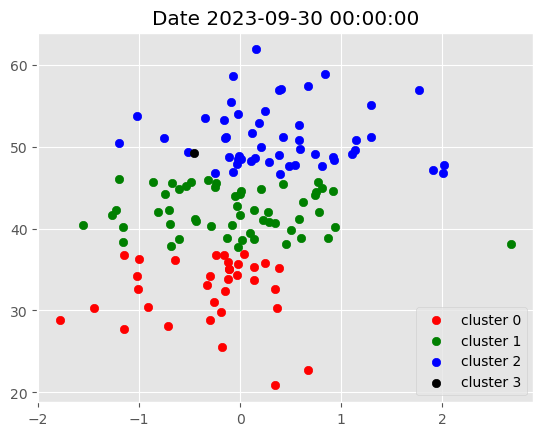

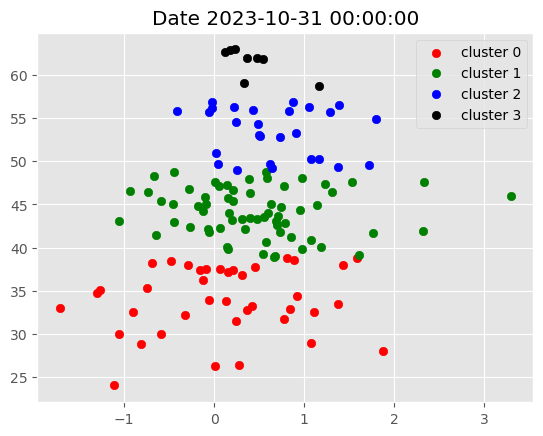

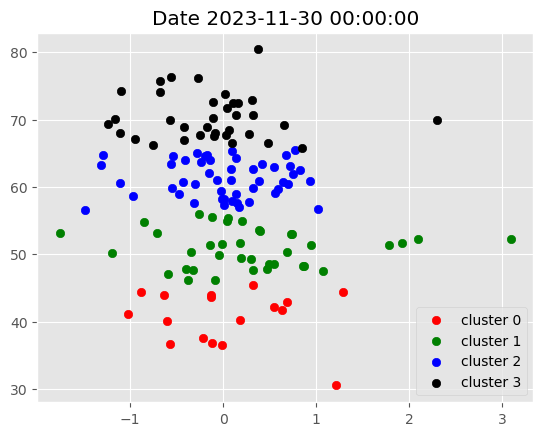

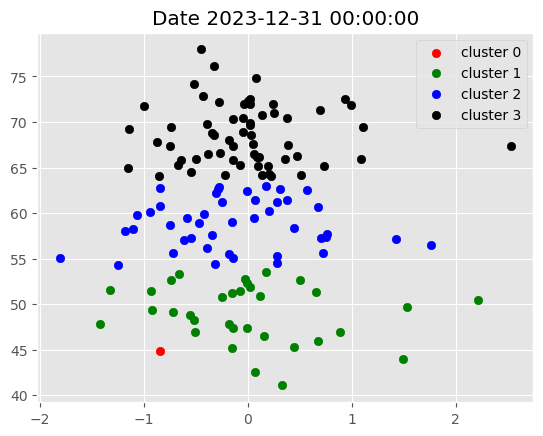

In [ ]:
plt.style.use("ggplot")

for i in data.index.get_level_values("date").unique().tolist():
    g = data.xs(i, level=0)

    plt.title(f"Date {i}")

    plot_clusters(g)

# For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

- First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

- Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.


In [ ]:
# Select cluster 3 stocks
# Create a dictionary with date as the first day of the month and stocks with cluster 3 from the previous month.
filtered_df = data[data["cluster"] == 3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index + pd.DateOffset(
    1
)  # add one day to the end of month date

filtered_df = filtered_df.reset_index().set_index(["date", "ticker"])  # multi-index

dates = filtered_df.index.get_level_values("date").unique().tolist()

fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime("%Y-%m-%d")] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2018-02-01': ['ABT',
  'ADBE',
  'AMZN',
  'BA',
  'BAC',
  'BRK-B',
  'CHTR',
  'CRM',
  'CTSH',
  'DG',
  'EA',
  'GOOG',
  'GOOGL',
  'JPM',
  'KR',
  'LMT',
  'LOW',
  'MA',
  'MAR',
  'MSFT',
  'NFLX',
  'NKE',
  'NVDA',
  'NXPI',
  'PNC',
  'PYPL',
  'RTX',
  'TMO',
  'V',
  'WFC',
  'WMT'],
 '2018-03-01': ['AAPL',
  'ADBE',
  'AMZN',
  'BA',
  'BKNG',
  'CRM',
  'CSCO',
  'CTSH',
  'INTC',
  'MA',
  'MU',
  'NFLX',
  'NXPI',
  'PANW',
  'TJX'],
 '2018-04-01': ['AMT',
  'BKNG',
  'CL',
  'COP',
  'INTC',
  'NEE',
  'PANW',
  'STZ',
  'TJX',
  'WYNN'],
 '2018-05-01': ['CMG', 'COP', 'EOG', 'HAL', 'OXY', 'PXD', 'ULTA', 'VLO'],
 '2018-06-01': ['ADBE',
  'AMD',
  'AMZN',
  'BIIB',
  'CMG',
  'CSX',
  'EXPE',
  'GM',
  'LLY',
  'LOW',
  'META',
  'NEE',
  'NFLX',
  'OXY',
  'PANW',
  'TJX',
  'TXN',
  'VLO'],
 '2018-07-01': ['ACN',
  'AMT',
  'BSX',
  'COST',
  'CRM',
  'EA',
  'EOG',
  'KR',
  'MDLZ',
  'NEE',
  'NFLX',
  'NKE',
  'PARA',
  'PEP',
  'PG',
  'REGN',
  'SHW',
  'TJX',

# Define portfolio optimization function

- We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

- To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

- Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Portfoli ooptimization function
def optimize_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(
        prices=prices, frequency=252
    )  # 252 is 1 year of trading data

    cov = risk_models.sample_cov(prices=prices, frequency=252)

    ef = EfficientFrontier(
        expected_returns=returns,
        cov_matrix=cov,
        weight_bounds=(
            lower_bound,
            0.1,
        ),  # to ensure a diversified and well balanced portfolio
        solver="SCS",
    )

    weights = ef.max_sharpe()

    return ef.clean_weights()

- Download Fresh Daily Prices Data only for short listed stocks.


In [ ]:
stocks = data.index.get_level_values("ticker").unique().tolist()

new_df = yf.download(
    tickers=stocks,
    start=data.index.get_level_values("date").unique()[0]
    - pd.DateOffset(months=12),  # set to at least 1 year before
    end=data.index.get_level_values("date").unique()[-1],
)

new_df

[*********************100%%**********************]  157 of 157 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-01-31  42.760242   28.233545   44.951492   36.922539  101.850815   
2017-02-01  42.566975   29.955250   44.789661   37.417549  101.260475   
2017-02-02  42.528324   29.904064   44.789661   37.788803  101.645081   
2017-02-03  42.711926   30.032026   44.627838   37.815311  102.405373   
2017-02-06  43.774891   30.313551   44.613132   37.505943  102.128098   
...               ...         ...         ...         ...         ...   
2023-12-22  14.310000  193.600006  153.473663  108.505814  353.160400   
2023-12-26  14.110000  193.050003  153.156693  108.704857  352.144104   
2023-12-27  13.990000  193.149994  153.414230  109.262161  352.532684   
2023-12-28  13.980000  193.580002  153.285461  109.869232  350.310791   
2023-12-29  13.740000  192.529999  153.503372  109.540817  349.633270   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-01-31  113.379997   87.153648   81.339996  53.358719   31.547512  ...   
2017-02-01  113.360001   82.200058   81.279999  53.367016   32.265961  ...   
2017-02-02  113.160004   83.123489   82.760002  53.242462   32.183067  ...   
2017-02-03  115.169998   83.598122   84.410004  53.923367   32.523876  ...   
2017-02-06  114.459999   83.252922   82.820000  53.890152   32.404125  ...   
...                ...         ...         ...        ...         ...  ...   
2023-12-22  598.750000  230.970001  242.759995  66.930000  162.050003  ...   
2023-12-26  598.260010  232.539993  245.070007  67.129997  164.279999  ...   
2023-12-27  596.080017  231.610001  245.110001  67.150002  164.210007  ...   
2023-12-28  595.520020  232.490005  244.910004  67.870003  163.119995  ...   
2023-12-29  596.599976  232.970001  243.479996  67.750000  162.070007  ...   

Price         Volume                                                  \
Ticker             V       VLO     VRTX        VZ       WBA      WDC   
Date                                                                   
2017-01-31   7479400  11657700  2418400  16844200   3424400  3617800   
2017-02-01   7534400   5204500  1754700  26004100   5080000  3897800   
2017-02-02  11142300   6193200  1290800  17787200   3667400  2982700   
2017-02-03  28079600   4416400  1226800  15166400   3167700  2624900   
2017-02-06   9665300   4297800  1423800  16151400   3418400  2307400   
...              ...       ...      ...       ...       ...      ...   
2023-12-22   5111500   2279000   804200  13157900   9776300  2936500   
2023-12-26   2085100   1807100   531600  11856600  10181100  2010800   
2023-12-27   4034700   1358000   594000  15267600   8265500  2167200   
2023-12-28   3020500   1661200   735600  14931700   7899900  4200000   
2023-12-29   4074600   1963400   727400  16205200  10853300  3478100   

Price                                             
Ticker           WFC      WMT     WYNN       XOM  
Date                                              
2017-01-31  22409100  9320900  1827500  19128100  
2017-02-01  21157700  9050000  3025400  15111800  
2017-02-02  13044400  8998700  1698700  12200100  
2017-02-03  19879800  7625300  1888800  12746300  
2017-02-06  13940200  9097200  2828800   9938200  
...              ...      ...      ...       ...  
2023-12-22  10448000  6467400  1170500  12921800  
2023-12-26   8856600  3893300  1150000  16835100  
2023-12-27  12536700  6632000  1142200  14558800  
2023-12-28   9872600  5592000  1233000  16329300  
2023-12-29  11731900  7314200  1144800  17741400  

[1741 rows x 942 columns]

- Calculate daily returns for each stock which could land up in our portfolio.

- Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

- If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

- Calculated each day portfolio return.


In [ ]:
returns_dataframe = np.log(new_df["Adj Close"]).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime(
            "%Y-%m-%d"
        )

        cols = fixed_dates[start_date]

        optimization_start_date = (
            pd.to_datetime(start_date) - pd.DateOffset(months=12)
        ).strftime("%Y-%m-%d")

        optimization_end_date = (
            pd.to_datetime(start_date) - pd.DateOffset(days=1)
        ).strftime("%Y-%m-%d")

        optimization_df = new_df[optimization_start_date:optimization_end_date][
            "Adj Close"
        ][cols]

        success = False
        try:
            weights = optimize_weights(
                prices=optimization_df,
                lower_bound=round(1 / (len(optimization_df.columns) * 2), 3),
            )

            weights = pd.DataFrame(weights, index=pd.Series(0))

            success = True
        except:
            print(
                f"Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights"
            )

        if success == False:
            weights = pd.DataFrame(
                [
                    1 / len(optimization_df.columns)
                    for i in range(len(optimization_df.columns))
                ],
                index=optimization_df.columns.tolist(),
                columns=pd.Series(0),
            ).T

        temp_df = returns_dataframe[start_date:end_date]

        temp_df = (
            temp_df.stack()
            .to_frame("return")
            .reset_index(level=0)
            .merge(
                weights.stack().to_frame("weight").reset_index(level=0, drop=True),
                left_index=True,
                right_index=True,
            )
            .reset_index()
            .set_index(["Date", "index"])
            .unstack()
            .stack()
        )

        temp_df.index.names = ["date", "ticker"]

        temp_df["weighted_return"] = temp_df["return"] * temp_df["weight"]

        temp_df = (
            temp_df.groupby(level=0)["weighted_return"]
            .sum()
            .to_frame("Strategy Return")
        )

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in t

""


## 8. Visualize Portfolio returns and compare to SP500 returns.


In [ ]:
spy = yf.download(tickers="SPY", start="2015-01-01", end=dt.date.today())

spy_ret = (
    np.log(spy[["Adj Close"]])
    .diff()
    .dropna()
    .rename({"Adj Close": "SPY Buy&Hold"}, axis=1)
)

portfolio_df = portfolio_df.merge(spy_ret, left_index=True, right_index=True)

portfolio_df

In [ ]:
import matplotlib.ticker as mtick

plt.style.use("ggplot")

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

portfolio_cumulative_return[:"2023-09-29"].plot(figsize=(16, 6))

plt.title("Unsupervised Learning Trading Strategy Returns Over Time")

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel("Return")

plt.show()